<a href="https://colab.research.google.com/github/brunacmendes/data_science/blob/master/AirBnB%20Listings%20Data%20Analysis%20%E2%80%94%20Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AirBnB Listings Data Analysis — *Toronto, Canada*


[Airbnb](https://www.airbnb.com/) is a popular home-sharing site that takes a unique approach toward lodging, by offering travelers from all around the world someone's home as a place to stay instead of a traditional hotel. 

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities. AirBnB offers over [7 million accommodations and 50,000 handcrafted activities](https://news.airbnb.com/about-us/) powered by local hosts, with more than 750 million guest arrivals to date.

The website [Inside Airbnb](http://insideairbnb.com/get-the-data.html) provides us access to millions of listings that generate a lot of data - data that can be analyzed and used for many projects and solutions in the most important cities in the world.

<center><img alt="Analysing Airbnb" width="20%" src="https://logospng.org/download/airbnb/logo-airbnb-1024.png"></center>

**In this notebook, we will be working with the City of Toronto summarized dataset to take some insights from the data, which contains information about listing prices, room types, rental periods, hosts, reviews, locations, and availability over a year.** 

To accomplish that, we're going through the following steps: 

  - Acquaring and loading the data;
  - Cleaning the data;
  - Analyzing the data.




## City of Toronto

## 1. Loading Libraries and Data


* `pandas` - library for data manipulation;

* `matplotlib` and `seaborn` - libraries for data visualization;


* `listings.csv ` - summary information and metrics for listings in Toronto (good for visualisations), last updated on May 7th, 2020.



In [0]:
# import packages

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline


In [0]:
# Read listings.csv into dataframe
df = pd.read_csv('http://data.insideairbnb.com/canada/on/toronto/2020-05-07/visualisations/listings.csv')


## 2. Exploring the Dataset

Firstly, we check the amount of rows in the dataset to understand the size we are working with.

Then, we display every column to understand the variables and its types.


In [27]:
# dataset volume
print("Listings: \t {}".format(df.shape[0]))

# number of variables
print("Variables: \t {}\n".format(df.shape[1]))

# display variables & types
display(df.dtypes)


Listings: 	 21771
Variables: 	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

  * `id` - id number that identifies the property
  * `name` - Property name
  * `host_id` - id number that identifies the host
  * `host_name` - Host name
  * `neighbourhood_group` - The main regions of the city
  * `neighbourhood` - The neighbourhoods
  * `latitude` - Property latitude
  * `longitude` - Property longitude
  * `room_type` - Type of the room
  * `price` - The price for one night
  * `minimum_nights` - Minimum amount of nights to book the place
  * `number_of_reviews` - Number of reviews received
  * `last_review` - Date of the last review
  * `reviews_per_month` - Amount of reviews per month
  * `calculated_host_listings_count` - Number of properties available on airbnb owned by the host
  * `availability_365` - Number of days of availability within 365 days



---


These 16 columns provide a rich amount of information for data exploration. We do already see some missing values, which will require cleaning and handling of NaN values.

Before we perform an analysis, we'll first see what our *dataset* looks like, by presenting the first ten entries.

In [19]:
# show first 10 entries
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,470,4,7,2017-12-04,0.12,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,105,180,169,2013-08-27,1.30,2,0
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,70,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,217,2019-12-22,1.79,2,0
4,26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,NaN,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,169,4,40,2020-03-20,0.35,5,365
5,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,53,120,26,2011-08-30,0.22,1,0
6,28160,"Luxury, Safety, Affordability For Women Travel...",86838,Rita,NaN,Mount Pleasant West,43.70410,-79.39026,Entire home/apt,60,120,7,2018-10-17,0.12,1,358
7,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64151,-79.37643,Entire home/apt,141,180,1,2010-08-11,0.01,2,365
8,40456,Downtown 2 Bdr.Apt with King Size Bed and Par...,174063,Denis,NaN,South Parkdale,43.63532,-79.44049,Entire home/apt,100,28,110,2020-03-25,0.93,5,342
9,41887,Great location,183071,Kyle,NaN,Oakridge,43.69466,-79.28667,Entire home/apt,69,2,82,2019-09-02,1.95,2,281


## 3. Data Cleaning & Analysis

### **3.1. Missing data**

In [24]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(round(df.isnull().sum() / df.shape[0] *100,2)).sort_values(ascending=False)

neighbourhood_group               100.00
reviews_per_month                  19.31
last_review                        19.31
host_name                           0.01
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
minimum_nights                      0.00
price                               0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_id                             0.00
name                                0.00
id                                  0.00
dtype: float64

### **3.2. Variable Distribution**

Histograms are important so we can see the distribuition for each variable and verify the existence of *outliers.*

An outlier is an observation that lies an abnormal distance from other values in a dataset.


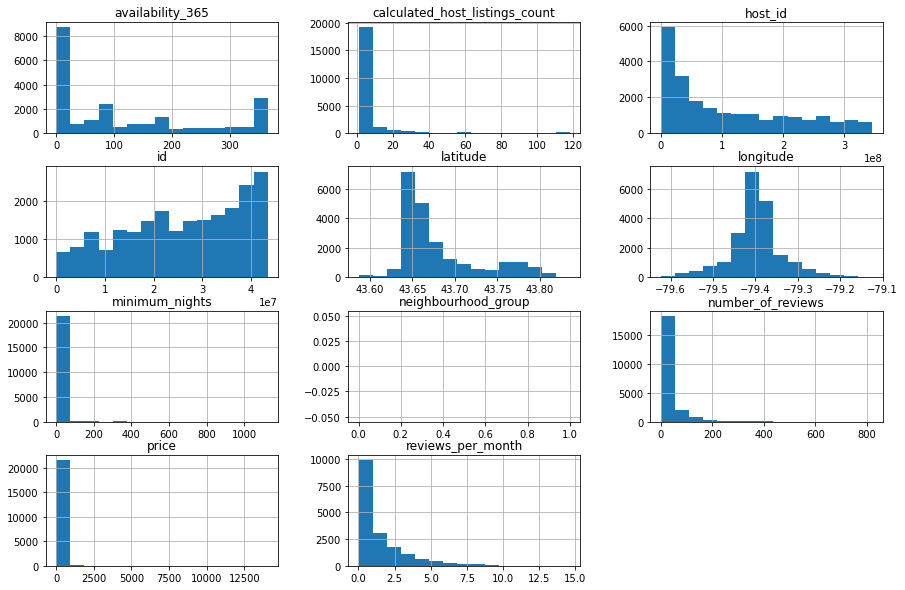

In [18]:
# histogram
df.hist(bins=15, figsize=(15,10));

### **3.3. Identifying and Removing Outliers**

We can deal with outliers by calculating the [standard devation](https://en.wikipedia.org/wiki/Standard_deviation) of the all the price values. It is standard practice to consider values above three times the standard deviation to be outliers.

In [0]:
# ver a média da coluna `price``


### **3.4 Correlations**

In [12]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.007831,-0.021346,0.023942,0.018398,0.029114
minimum_nights,0.007831,1.000000,-0.030278,-0.043830,-0.012369,0.109909
number_of_reviews,-0.021346,-0.030278,1.000000,0.744785,-0.046463,0.077293
reviews_per_month,0.023942,-0.043830,0.744785,1.000000,-0.041740,0.046904
calculated_host_listings_count,0.018398,-0.012369,-0.046463,-0.041740,1.000000,0.132067
availability_365,0.029114,0.109909,0.077293,0.046904,0.132067,1.000000


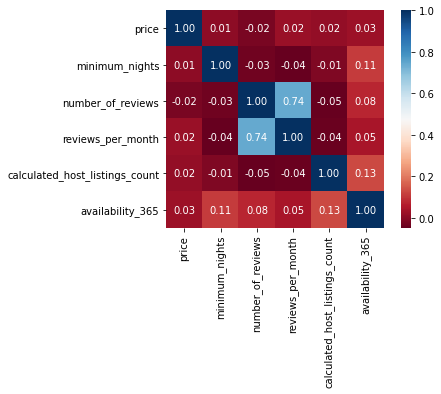

In [13]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **3.5. Exploratory Questions**

#### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

NameError: ignored

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

#### **Q6. Qual a localidade mais cara do dataset?**



In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longintude', y='latitude', alpha=0.4,
              c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))

#### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``

## Conclusões
